# Data Science Salaries
In this project we will perform some statistics on data science salaries in different parts of the world from 2020 to 2022. We will be mainly focusing on how various factors affect the salary.

As always, we begin with importing the libraries.

In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from datetime import datetime

import warnings; warnings.filterwarnings('ignore')

## 1. Data Loading

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Before we get started, let's view some information about the dataset. For that we will use the `info` method provided by the `pandas` `DataFrame`.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


We then view some common summary statistics using the `describe` method.

In [4]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


## 2. Data Cleaning

From the previous section we can observe the following:
- We have one meaningless column — `Unnamed: 0`
- The `salary` column is somewhat redundant. We can rely on the `salary_in_usd` column to compare salaries. We will keep the currency column anyways.
- There doesn't seem to be null/na values with the dataset.

### 2.1. Removing Unnecessary Columns

In [5]:
df.drop(columns=['Unnamed: 0', 'salary'], axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


### 2.2. Handling Duplicates

In [6]:
print(f'Duplicates before: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)
print(f'Duplicates after: {df.duplicated().sum()}') # Making sure the duplicates were removed

Duplicates before: 42
Duplicates after: 0


### 2.3. Handling Missing Data

There likely isn't any missing data. We will do a quick check to further assure that.

In [7]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### 2.4. Handling Outliers

Numeric columns:
- salary_in_usd
- work_year
- remote_ratio

We will examine each of these columns and decide whether an action must be taken towards the outliers.

In [9]:
def view_percentages(df, col):
  total = df[col].count()
  for val in df[col].unique():
    cnt = df[col][df[col] == val].count()
    print(f'{val} records percentage: {cnt/total*100:.2f}%')

In [10]:
view_percentages(df, 'work_year')

2020 records percentage: 12.74%
2021 records percentage: 38.05%
2022 records percentage: 49.20%


In [11]:
view_percentages(df, 'remote_ratio')

0 records percentage: 21.42%
50 records percentage: 17.35%
100 records percentage: 61.24%


In [12]:
default_color = sns.color_palette()[9]

count       565.000000
mean     110610.343363
std       72280.702792
min        2859.000000
25%       60757.000000
50%      100000.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64


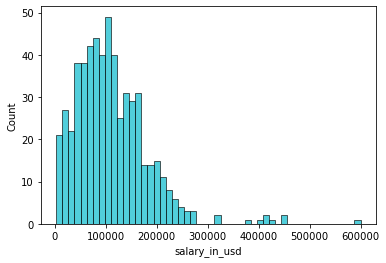

In [13]:
print(df['salary_in_usd'].describe())
plt.figure(figsize=(6, 4))
g = sns.histplot(data=df, x='salary_in_usd', bins=50, color=default_color)

There seems to be a few outliers after the 300,000 USD.

In [14]:
print(df['salary_in_usd'][df['salary_in_usd'] > 500000].count())
print(df['salary_in_usd'][df['salary_in_usd'] > 400000].count())
print(df['salary_in_usd'][df['salary_in_usd'] > 350000].count())
print(df['salary_in_usd'][df['salary_in_usd'] > 300000].count())

1
7
8
10


There are only 10 records with salaries above 300,000 USD. That said, we can safely consider these records to be outliers and remove them.

count       555.000000
mean     105062.781982
std       58981.192674
min        2859.000000
25%       60000.000000
50%      100000.000000
75%      145500.000000
max      276000.000000
Name: salary_in_usd, dtype: float64


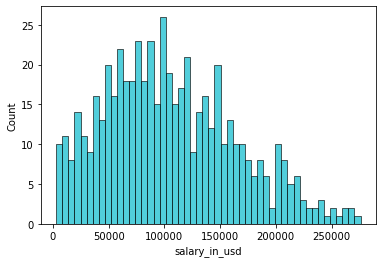

In [15]:
df = df[df['salary_in_usd'] < 300000]
print(df['salary_in_usd'].describe())
plt.figure(figsize=(6, 4))
g = sns.histplot(data=df, x='salary_in_usd', bins=50, color=default_color)

#### Final Check After Cleaning

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           555 non-null    int64 
 1   experience_level    555 non-null    object
 2   employment_type     555 non-null    object
 3   job_title           555 non-null    object
 4   salary_currency     555 non-null    object
 5   salary_in_usd       555 non-null    int64 
 6   employee_residence  555 non-null    object
 7   remote_ratio        555 non-null    int64 
 8   company_location    555 non-null    object
 9   company_size        555 non-null    object
dtypes: int64(3), object(7)
memory usage: 63.9+ KB


In [17]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,555.000000,555.000000,555.000000
mean,2021.371171,105062.781982,69.639640
std,0.694926,58981.192674,40.992381
min,2020.000000,2859.000000,0.000000
25%,2021.000000,60000.000000,50.000000
50%,2021.000000,100000.000000,100.000000
75%,2022.000000,145500.000000,100.000000
max,2022.000000,276000.000000,100.000000


At this point, we can describe the dataset as follows:
- There are 555 records.
- The data is free from any outliers and missing values.
- The dataset has 9 columns. Three of which are numeric, and six are categorical.

In [18]:
view_percentages(df, 'work_year')

2020 records percentage: 12.43%
2021 records percentage: 38.02%
2022 records percentage: 49.55%


In [19]:
view_percentages(df, 'remote_ratio')

0 records percentage: 21.62%
50 records percentage: 17.48%
100 records percentage: 60.90%


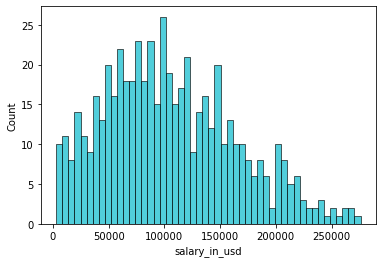

In [20]:
df = df[df['salary_in_usd'] < 300000]
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='salary_in_usd', bins=50, color=default_color);

## 3. Exploratory Data Analysis (EDA)

### 3.1. Univariate Exploration

#### 3.1.1. Univariate Exploration For Categorical Columns

In this part of the analysis, we will perform univariate exploration of our data. Typical univariate exploration involves displaying the distribution for the columns within the dataset.

In [21]:
def view_distribution_vert(df, col, figsize=(12, 15), log=False):
  plt.figure(figsize=figsize)
  g = sns.countplot(data=df,
                    y=col,
                    order = df[col].value_counts().index, # sort the bars by count
                    color=default_color);
  if log:
    g.set_xscale('log')

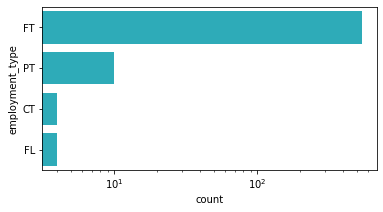

In [22]:
view_distribution_vert(df, 'employment_type', (6, 3), log=True)

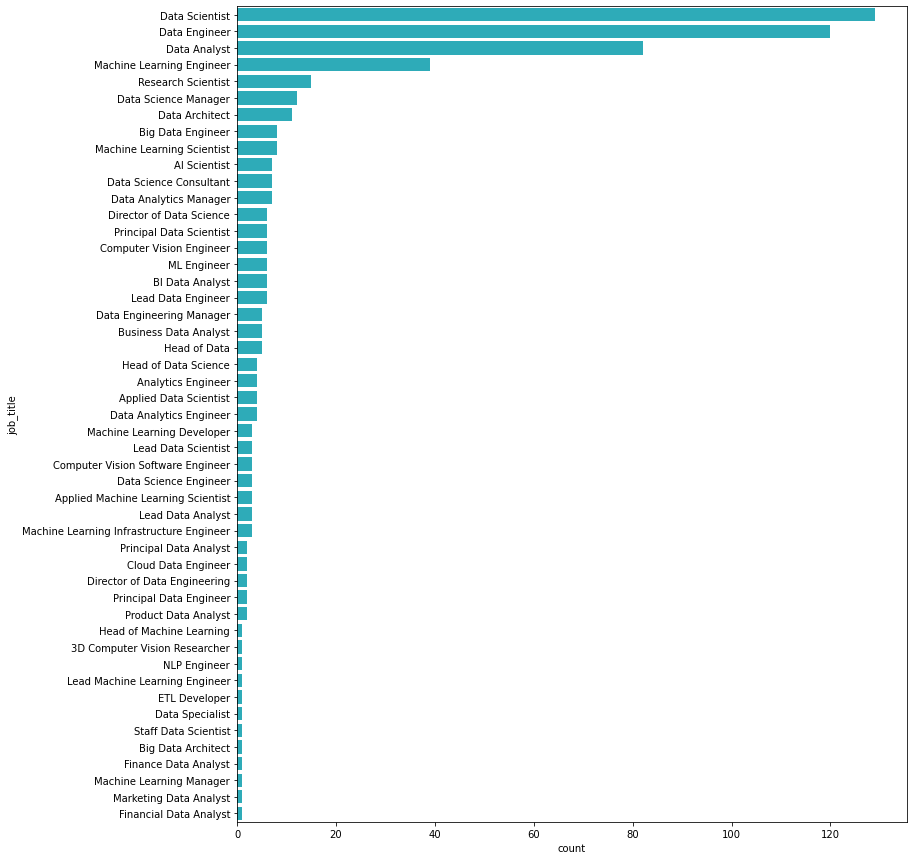

In [23]:
view_distribution_vert(df, 'job_title')

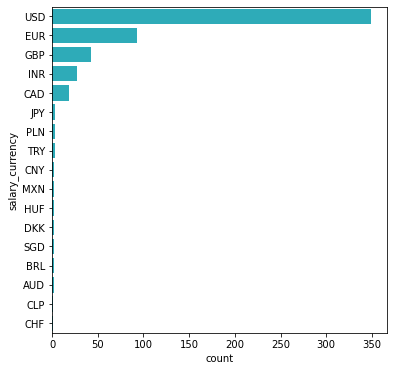

In [24]:
view_distribution_vert(df, 'salary_currency', (6, 6))

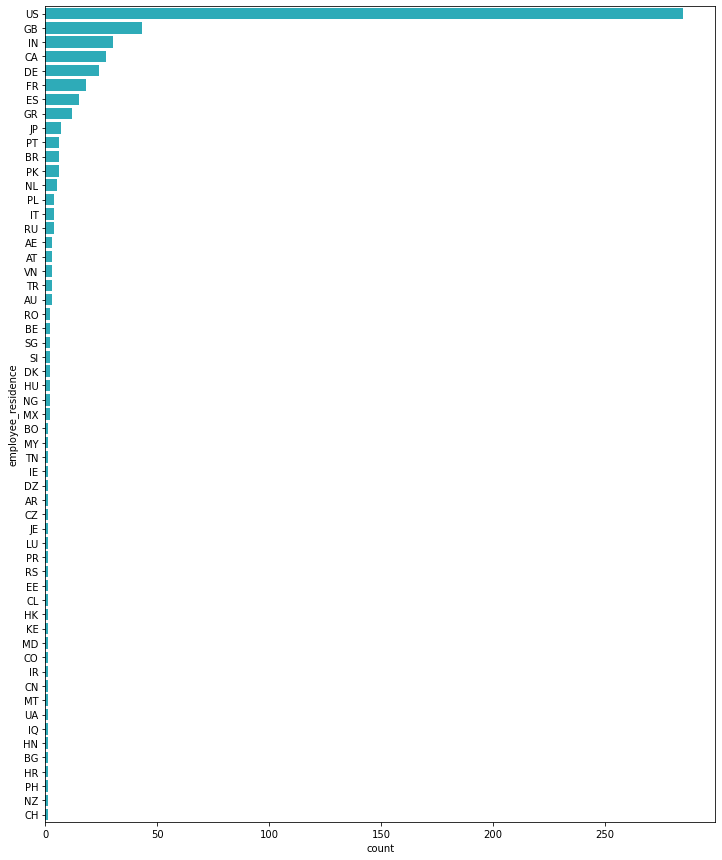

In [25]:
view_distribution_vert(df, 'employee_residence')

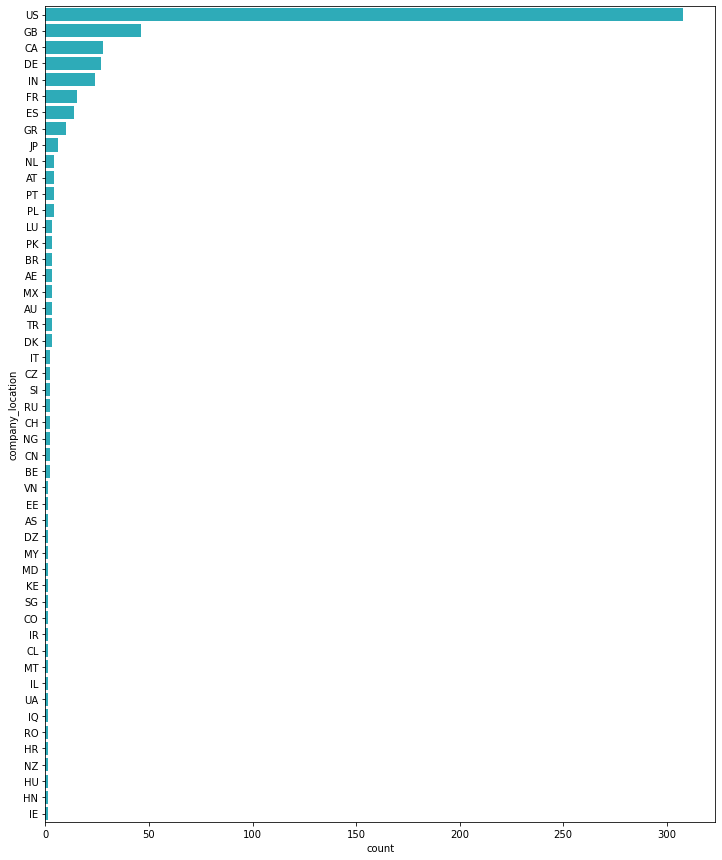

In [26]:
view_distribution_vert(df, 'company_location')

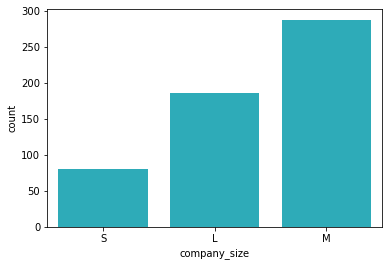

In [27]:
sns.countplot(data=df, x='company_size', order=['S', 'L', 'M'], color=default_color);

#### 3.1.2. Univariate Exploration For Numerical Columns

In [28]:
for x in df.columns: print(x)

work_year
experience_level
employment_type
job_title
salary_currency
salary_in_usd
employee_residence
remote_ratio
company_location
company_size


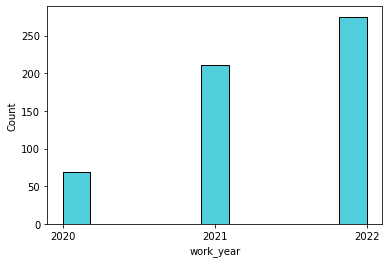

In [29]:
sns.histplot(data=df, x='work_year', color=default_color)
plt.xticks([2020 ,2021, 2022]);

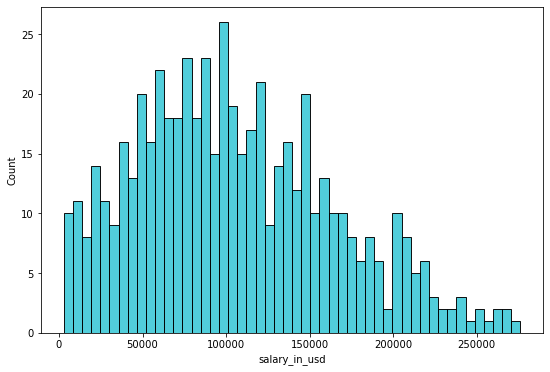

In [30]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df['salary_in_usd'], bins=50, color=default_color);

In [31]:
df['salary_in_usd'].describe()

count       555.000000
mean     105062.781982
std       58981.192674
min        2859.000000
25%       60000.000000
50%      100000.000000
75%      145500.000000
max      276000.000000
Name: salary_in_usd, dtype: float64

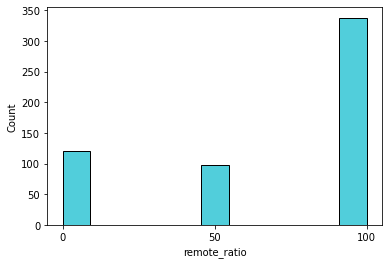

In [32]:
# plt.figure(figsize=(9, 6))
sns.histplot(data=df['remote_ratio'], color=default_color)
plt.xticks([0, 50, 100]);

### 3.2. Bivariate Exploration

In this section we will explore the relations between feature pairs.

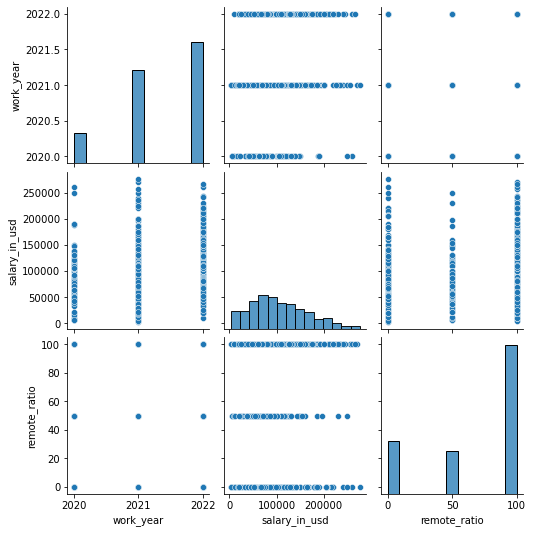

In [33]:
sns.pairplot(data=df);

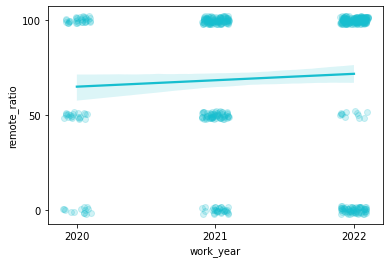

In [34]:
sns.regplot(data=df, 
            x='work_year', y='remote_ratio', 
            x_jitter=0.1, y_jitter=2.0, 
            scatter_kws={'alpha':1/5},
            color=default_color
)
plt.xticks([2020, 2021, 2022])
plt.yticks([0, 50, 100]);

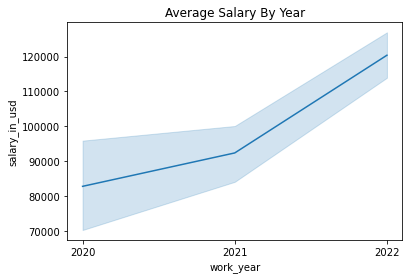

In [35]:
sns.lineplot(data=df, 
                x='work_year', 
                y='salary_in_usd'
)
plt.title('Average Salary By Year')
plt.xticks([2020, 2021, 2022]);

The averages of salaries seem to increase from year to year.

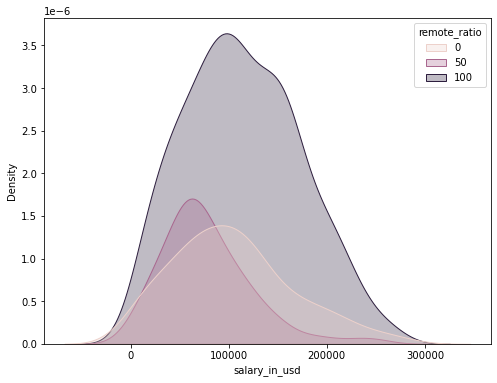

In [36]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, 
            x='salary_in_usd', 
            hue='remote_ratio',
            fill=True,
            alpha=0.3);
# plt.xticks(ticks=np.arange(0, 350000, 50000));

There's no clear relation between the remote ratio and salary.

### 3.3. Multivariate Exploration

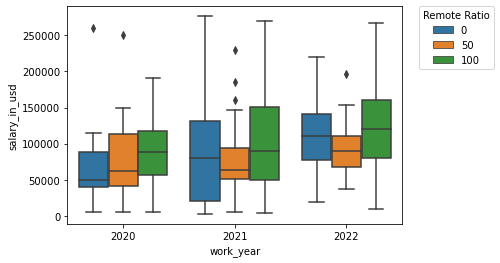

In [37]:
sns.boxplot(data=df, 
            x='work_year', 
            y='salary_in_usd', 
            hue='remote_ratio'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Remote Ratio');

When split by year, it becomes clearer that fully-remote jobs tend to pay higher than their on-site and hybrid counterparts.

In [38]:
df.groupby('work_year').describe().salary_in_usd

,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,69.0,82775.884058,53887.352872,5707.0,45618.0,72000.0,112872.0,260000.0
2021,211.0,92362.744076,61377.724346,2859.0,49823.0,81000.0,128610.5,276000.0
2022,275.0,120399.160000,54225.790180,10000.0,78658.5,118187.0,158600.0,266400.0


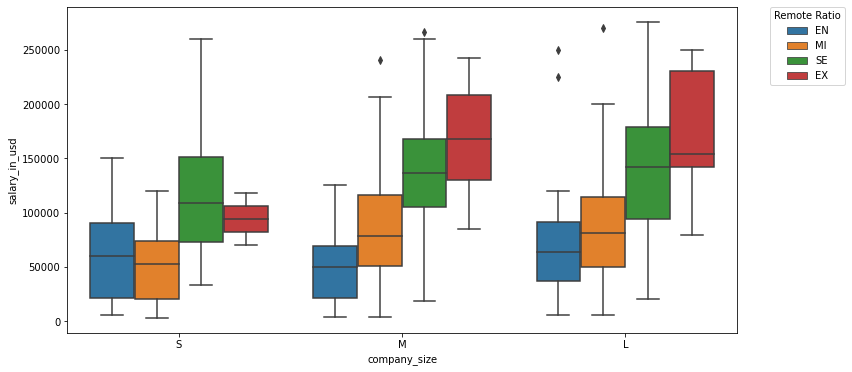

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, 
            x='company_size', 
            y='salary_in_usd', 
            hue='experience_level',
            order=['S', 'M', 'L'],
            hue_order=['EN', 'MI', 'SE', 'EX']
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Remote Ratio');

c:\Users\Moaaz\.conda\envs\general\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


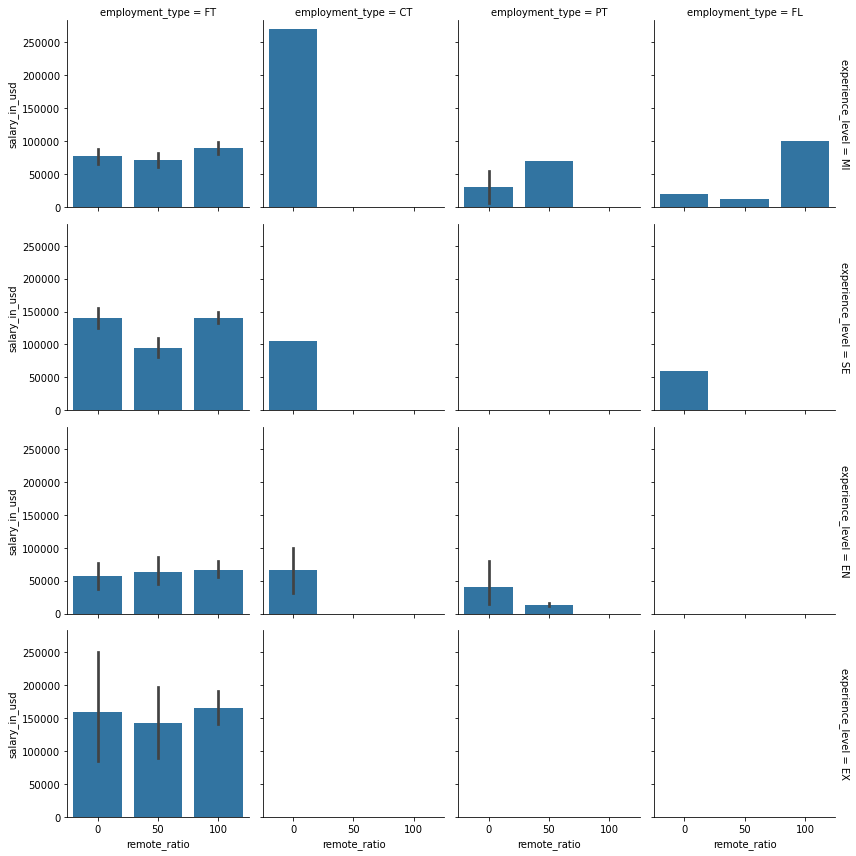

In [40]:
g = sns.FacetGrid(data=df,
                  row='experience_level',
                  col='employment_type',
                  margin_titles=True)
g.map(sns.barplot, 'remote_ratio', 'salary_in_usd');

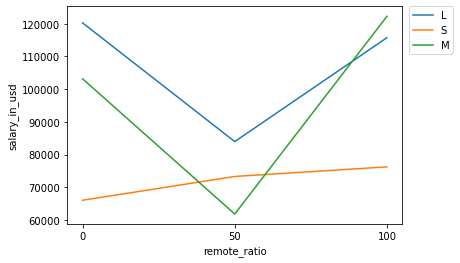

In [41]:
sns.lineplot(data=df, 
             x='remote_ratio', 
             y='salary_in_usd', 
             hue='company_size', 
             err_style=None)
plt.xticks([0, 50, 100])
plt.legend(loc=(1.02, 0.78));

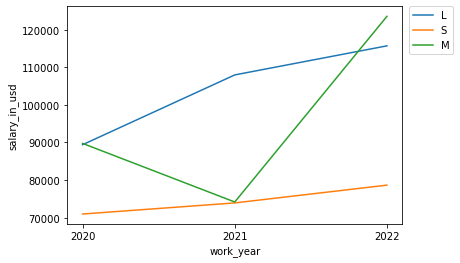

In [42]:
sns.lineplot(data=df, 
             x='work_year', 
             y='salary_in_usd', 
             hue='company_size', 
             err_style=None)
plt.xticks([2020, 2021, 2022])
plt.legend(loc=(1.02, 0.78));

Most probably this decline in 2021 for medium-sized companies is due to the pandemic. The rapid recovery in 2022 supports that.

## 4. Explanatory Data Analysis
In this section, we will be using Plotly to summarize the findings from the previous sections.

#### Quick Summary
Here is a quick summary for salaries in 2020, 2021, and 2022 for data science jobs:
<html>
  <head>
    <style>
      @import url('https://fonts.googleapis.com/css?family=Source+Sans+Pro:400,700');

$base-spacing-unit: 24px;
$half-spacing-unit: $base-spacing-unit / 2;

$color-alpha: #1772FF;
$color-form-highlight: #EEEEEE;

*, *:before, *:after {
	box-sizing:border-box;
}

body {
	padding:$base-spacing-unit;
	font-family:'Source Sans Pro', sans-serif;
	margin:0;
}

h1,h2,h3,h4,h5,h6 {
	margin:0;
}

.container {
	max-width: 1000px;
	margin-right:auto;
	margin-left:auto;
	display:flex;
	justify-content:center;
	align-items:center;
	min-height:100vh;
}

.table {
	width:100%;
	border:1px solid $color-form-highlight;
}

.table-header {
	display:flex;
	width:100%;
	background:#000;
	padding:($half-spacing-unit * 1.5) 0;
}

.table-row {
	display:flex;
	width:100%;
	padding:($half-spacing-unit * 1.5) 0;
	
	&:nth-of-type(odd) {
		background:$color-form-highlight;
	}
}

.table-data, .header__item {
	flex: 1 1 20%;
	text-align:center;
}

.header__item {
	text-transform:uppercase;
}

.filter__link {
	color:white;
	text-decoration: none;
	position:relative;
	display:inline-block;
	padding-left:$base-spacing-unit;
	padding-right:$base-spacing-unit;
	
	&::after {
		content:'';
		position:absolute;
		right:-($half-spacing-unit * 1.5);
		color:white;
		font-size:$half-spacing-unit;
		top: 50%;
		transform: translateY(-50%);
	}
	
	&.desc::after {
		content: '(desc)';
	}

	&.asc::after {
		content: '(asc)';
	}
	
}
    </style>
  </head>
  <body>
    <table style="background-color: lightgrey;">
      <thead>
        <td>Year</td>
        <td>Mean</td>
        <td>Std.</td>
        <td>Min.</td>
        <td>25<sup>th</sup> perc.</td>
        <td>Median</td>
        <td>75<sup>th</sup> perc.</td>
        <td>Max.</sup></td>
      </thead>
      <tbody>
        <tr>
          <td>2020</td><td>82776<td>53887</td><td>5707</td><td>45618</td><td>72000</td><td>112872</td><td>260000</td>
        </tr>
        <tr>
        <td>2021</td><td>92362</td><td>61377</td><td>2859</td><td>49823</td><td>81000</td><td>128610</td><td>276000</td>
        </tr>
        <tr>
          <td>2022</td><td>120399</td><td>54225</td><td>10000</td><td>78658</td><td>118187</td><td>158600</td><td>266400</td>
        </tr>
      </tbody>
    </table>
    </body>
</html>


#### On-Site VS Hybrid VS Remote Jobs

In [43]:
labels = dict(work_year='Year', 
              remote_ratio='Remote Ratio', 
              salary_in_usd='Salary (USD)'
             )
             
px.box(data_frame=df,
       x='work_year',
       y='salary_in_usd', 
       color='remote_ratio',
       title='Remote Ratio VS Salaries',
       labels=labels
      )

Compared to on-site and hybrid jobs, remote jobs tend to pay noticeably higher.

#### How the Salary Changes as the Data Scientist Progresses

In [44]:
labels = dict(company_size='Company Size', 
              salary_in_usd='Salary (USD/Year)', 
              experience_level='Experience Level'
             )
category_orders = {'company_size': ['S', 'M', 'L'],
                   'experience_level': ['EN', 'MI', 'SE', 'EX']
                  }
fig = px.box(data_frame=df,
             x='company_size', 
             y='salary_in_usd', 
             color='experience_level',
             title='Salaries VS Experience Level',
             labels=labels,
             category_orders=category_orders,
            )

newnames = {'EN':'Entry', 
            'MI':'Mid', 
            'SE':'Senior', 
            'EX':'Executive'
           }
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

fig.show()

Investigating the change in the mean salaries with the experience level, we can observe the following:
- There is no interesting pattern for samll companies.
- For medium-sized companies, the percent change in median salary is as follows: 
  - Entry level to mid level: 58.1%
  - Mid level to senior level: 73%
  - Senior level to executive level: 23%
- For larger companies: 
  - Entry level to mid level: 27%
  - Mid level to senior level: 75%
  - Senior level to executive level: 8%
  
It also appears that the greatest increases happen when transitioning from a mid-level to a senior-level position.

### The Change In Salaries Over Time and the Effect of Covid

In [77]:
labels = dict(company_size='Company Size', 
              salary_in_usd='Salary (USD/Year)', 
              work_year='Year'
             )

fig = make_subplots(specs=[[{"secondary_y": True}]], 
                    x_title='Year', y_title='Average Salaray (USD/Year)',
                   )

for size in ['S', 'M', 'L']:
  df_aux = df.query(f'company_size == "{size}"')
  fig.add_trace(go.Line(x=df_aux['work_year'].unique(),
                        y=np.array(df_aux.groupby('work_year').mean()['salary_in_usd']),
                        name=size
                       )
               )

fig.update_layout(title_text='The Change In Salaries Over Time',
                  xaxis=dict(showgrid=False),
                  height=600,
                  legend=dict(title='Company Size')
                 )

fig.update_xaxes(tickmode = 'array',
                 tickvals = [2020, 2021, 2022]
                )

fig.show();

For small companies, the trend in the average salaries shows an increase at a nearly constant rate.

For mid-sized companies, there appears to be a huge decline in salaries in 2021. A potential reason for that is the pandemic, especially that there is a rapid recovery in 2022.

For larger companies, no special trends can be observed, as the data is recorded for only three years. But the average of the salaries is generally increasing.